In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [138]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [139]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [140]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(autoload_with=engine)

In [141]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [142]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [143]:
# Create our session (link) from Python to the DB

session = Session(engine)

In [144]:
#set up inspector to view tables 

inspector = inspect(engine)

measurement_columns = inspector.get_columns('Measurement')
for column in measurement_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [145]:
station_columns = inspector.get_columns('Station')
for column in station_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [146]:
# Find the most recent date in the data set.

most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

<AxesSubplot:xlabel='date', ylabel='inches'>

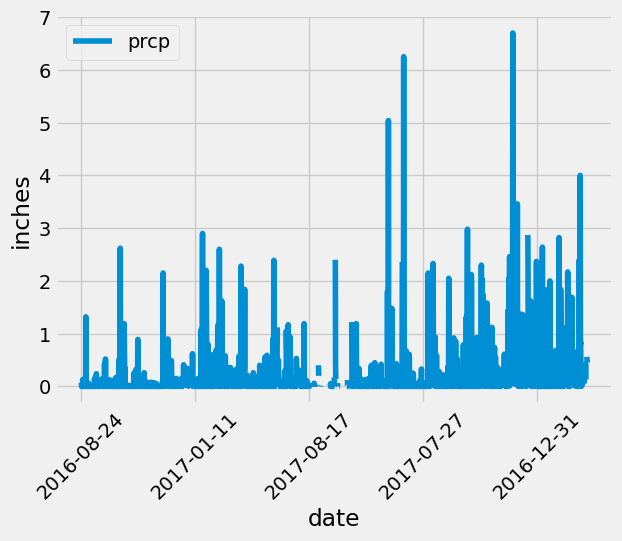

In [147]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

one_year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

one_year_rain = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > one_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(one_year_rain)
df.set_index('date', inplace=True)

# Sort the dataframe by date

df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data

df.plot(ylabel='inches', rot=45,legend=True)


In [148]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.prcp.describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [176]:
# Design a query to calculate the total number stations in the dataset

session.query(Station.station).distinct().count()

9

In [171]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.id)).\
                                group_by(Measurement.station).\
                                order_by(func.count(Measurement.id).desc()).\
                                all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [175]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                            filter(Measurement.station == "USC00519281").all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

<AxesSubplot:ylabel='Frequency'>

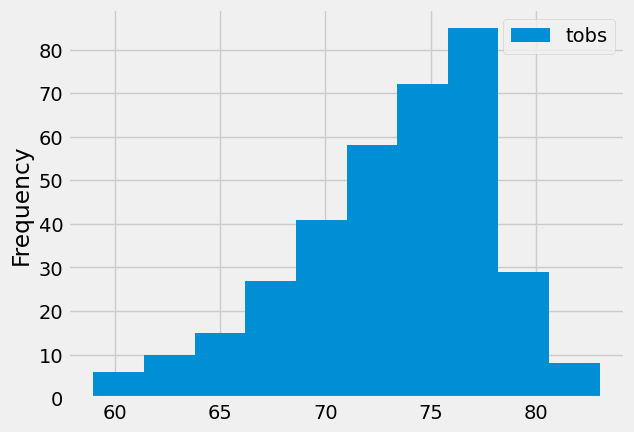

In [188]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

active_year = session.query(Measurement.station, Measurement.tobs, Measurement.date).\
    filter(Measurement.station == "USC00519281").\
    filter(Measurement.date > one_year).all()

new_df = pd.DataFrame(active_year)
new_df.plot(kind="hist", xlabel="Temperature")


In [ ]:
# Close Session
session.close()